<a href="https://colab.research.google.com/github/Nilstam428/Basic_python_project/blob/master/dl_exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!pip install kaggle

# UPload kaggle API key (kaggle.json)
files.upload()

#Move kaggle.json to proper location
!mkdir -p ~/.kaggle/ && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

#Download MNIST Dataset
!kaggle datasets download -d oddrationale/mnist-in-csv

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv
License(s): CC0-1.0
  0% 0.00/15.2M [00:00<?, ?B/s]
100% 15.2M/15.2M [00:00<00:00, 1.28GB/s]


In [4]:
#Implementig a perceptron
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

#load mnist dataset
(x_train, y_train), (x_test, y_tesy) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
# Flatten 28*28 images to 784 features
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

In [7]:
#train perceptron (sinlgle layer)
clf = Perceptron(max_iter=20, tol=0.001, random_state=42)
clf.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(max_iter=20, random_state=42)

In [12]:
#Accuracy
acc = accuracy_score(y_tesy, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.8602


In [8]:
#predictions
y_pred = clf.predict(x_test)

### Shallow Neural Network


In [13]:
# Shallow NN using Tensorflow/keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:

# Build shallow NN (1 hidden layer)
model = Sequential([
    Flatten(input_shape=(28, 28)),     # Flatten 28x28 images
    Dense(128, activation='relu'),     # Hidden layer (shallow architecture)
    Dense(10, activation='softmax')    # Output layer
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Train
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8711 - loss: 0.4591 - val_accuracy: 0.9630 - val_loss: 0.1345
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9605 - loss: 0.1295 - val_accuracy: 0.9717 - val_loss: 0.1037
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9753 - loss: 0.0824 - val_accuracy: 0.9772 - val_loss: 0.0829
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9820 - loss: 0.0590 - val_accuracy: 0.9747 - val_loss: 0.0838
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9867 - loss: 0.0438 - val_accuracy: 0.9788 - val_loss: 0.0741
313/313 - 1s - 2ms/step - accuracy: 0.9775 - loss: 0.0762

Test accuracy: 0.9775000214576721


### Pytorch Implementation

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [26]:
# Transform: normalize pixel values
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load dataset
train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_data = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000, shuffle=False)


In [27]:
class SquareActivation(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return input ** 2

    @staticmethod
    def backward(ctx, grad_output):
        (input,) = ctx.saved_tensors
        return grad_output * 2 * input

square_act = SquareActivation.apply


In [28]:
class CustomNet(nn.Module):
    def __init__(self, hidden_activation="relu", output_unit="softmax"):
        super(CustomNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.5)

        self.fc3 = nn.Linear(128, 10)

        # choose hidden activation
        if hidden_activation == "tanh":
            self.hidden_act = nn.Tanh()
        elif hidden_activation == "relu":
            self.hidden_act = nn.ReLU()
        elif hidden_activation == "square":
            self.hidden_act = square_act
        else:
            raise ValueError("Invalid hidden activation")

        # choose output activation
        self.output_unit = output_unit

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.dropout1(self.hidden_act(self.bn1(self.fc1(x))))
        x = self.dropout2(self.hidden_act(self.bn2(self.fc2(x))))
        x = self.fc3(x)

        if self.output_unit == "softmax":
            return torch.softmax(x, dim=1)
        else:  # linear output
            return x


In [29]:
def train_model(hidden="relu", output="softmax", epochs=15, reg=1e-4):
    model = CustomNet(hidden_activation=hidden, output_unit=output)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=reg)  # weight decay = L2 regularization

    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            output_pred = model(images)
            loss = criterion(output_pred, labels)
            loss.backward()  # recursive chain rule → backprop
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

    # test accuracy
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100 * correct / total
    print(f"Test Accuracy ({hidden}, {output}): {acc:.2f}%")


In [30]:
# Different hidden activations
train_model(hidden="tanh", output="softmax", epochs=3)
train_model(hidden="relu", output="softmax", epochs=3)
train_model(hidden="square", output="softmax", epochs=3)  # custom op

# Linear output (not common for classification, but shown for experiment)
train_model(hidden="relu", output="linear", epochs=3)


Epoch 1, Loss: 1.8472
Epoch 2, Loss: 1.8182
Epoch 3, Loss: 1.8127
Test Accuracy (tanh, softmax): 67.13%
Epoch 1, Loss: 1.8006
Epoch 2, Loss: 1.7415
Epoch 3, Loss: 1.7359
Test Accuracy (relu, softmax): 74.88%
Epoch 1, Loss: 1.8812
Epoch 2, Loss: 1.7980
Epoch 3, Loss: 1.7855
Test Accuracy (square, softmax): 70.92%
Epoch 1, Loss: 0.7931
Epoch 2, Loss: 0.6010
Epoch 3, Loss: 0.5845
Test Accuracy (relu, linear): 84.32%


Epoch 1/20 | Train Loss: 0.3440 | Val Loss: 0.1717 | Val Acc: 94.42%
Epoch 2/20 | Train Loss: 0.1544 | Val Loss: 0.1292 | Val Acc: 95.76%
Epoch 3/20 | Train Loss: 0.1141 | Val Loss: 0.1120 | Val Acc: 96.41%
Epoch 4/20 | Train Loss: 0.0913 | Val Loss: 0.0834 | Val Acc: 97.35%
Epoch 5/20 | Train Loss: 0.0743 | Val Loss: 0.1053 | Val Acc: 96.88%
Epoch 6/20 | Train Loss: 0.0679 | Val Loss: 0.0911 | Val Acc: 97.16%
Epoch 7/20 | Train Loss: 0.0578 | Val Loss: 0.0763 | Val Acc: 97.80%
Epoch 8/20 | Train Loss: 0.0520 | Val Loss: 0.0943 | Val Acc: 97.01%
Epoch 9/20 | Train Loss: 0.0478 | Val Loss: 0.0946 | Val Acc: 97.36%
Epoch 10/20 | Train Loss: 0.0425 | Val Loss: 0.0818 | Val Acc: 97.81%
Epoch 11/20 | Train Loss: 0.0381 | Val Loss: 0.0780 | Val Acc: 97.74%
Epoch 12/20 | Train Loss: 0.0339 | Val Loss: 0.0919 | Val Acc: 97.48%
Epoch 13/20 | Train Loss: 0.0336 | Val Loss: 0.0844 | Val Acc: 97.91%
Epoch 14/20 | Train Loss: 0.0334 | Val Loss: 0.0896 | Val Acc: 97.62%
Epoch 15/20 | Train Loss: 0.0

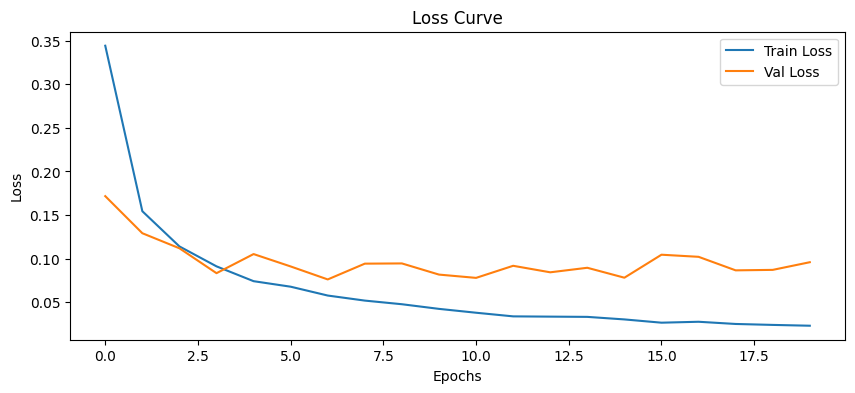

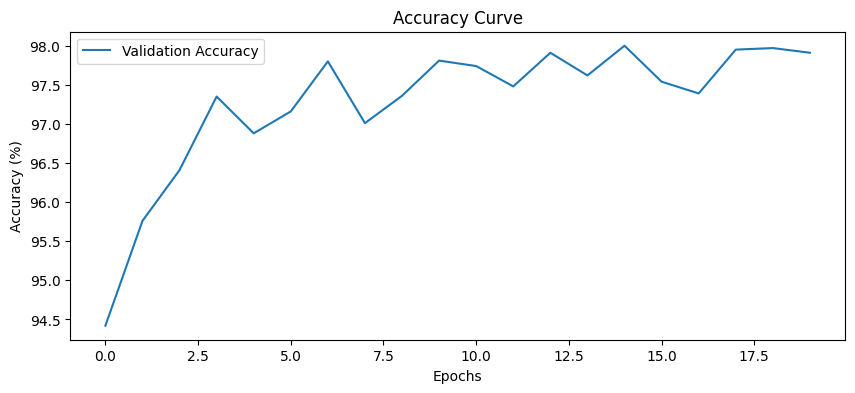

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1. Data (light normalization, no heavy augmentation)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_data = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000, shuffle=False)


# 2. Model (shallow but strong enough)
class ShallowNet(nn.Module):
    def __init__(self):
        super(ShallowNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # raw scores → CrossEntropyLoss handles softmax
        return x


# 3. Training function
def train_model(epochs=20):
    model = ShallowNet()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # no weight decay

    train_losses, val_losses, val_accs = [], [], []

    for epoch in range(epochs):
        # ---- Train ----
        model.train()
        total_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        train_losses.append(total_loss / len(train_loader))

        # ---- Validation ----
        model.eval()
        val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_losses.append(val_loss / len(test_loader))
        val_accs.append(100 * correct / total)

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_losses[-1]:.4f} "
              f"| Val Loss: {val_losses[-1]:.4f} "
              f"| Val Acc: {val_accs[-1]:.2f}%")

    return model, train_losses, val_losses, val_accs


# 4. Run training
model, train_losses, val_losses, val_accs = train_model(epochs=20)


# 5. Plot curves
plt.figure(figsize=(10,4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.title("Loss Curve"); plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(val_accs, label="Validation Accuracy")
plt.xlabel("Epochs"); plt.ylabel("Accuracy (%)"); plt.title("Accuracy Curve"); plt.legend()
plt.show()
